<a href="https://colab.research.google.com/github/bhojaram/TheSparkFoundation/blob/main/SampleSuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP TheSparkFoundation
# Task 3 : Exploratory Data Analysis- Retail
# Author : Bhojaram SA

In [1]:
#import necessary library

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Read a file and make a dataframe

In [2]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#EDA and data pre-processing

In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
#counting null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#drop the column postal code

df.drop('Postal Code', axis=1, inplace=True)



#Find duplicate row and remove

In [9]:
#total duplicate rows

df.duplicated().sum()


50

In [10]:
#drop duplicate rows

df.drop_duplicates(inplace=True)


In [11]:
df.shape

(9944, 12)

#Business Analysis of SuperStore Data

<ipython-input-12-0a63e4548fcb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_profit.index, y=state_profit.values, palette='coolwarm')


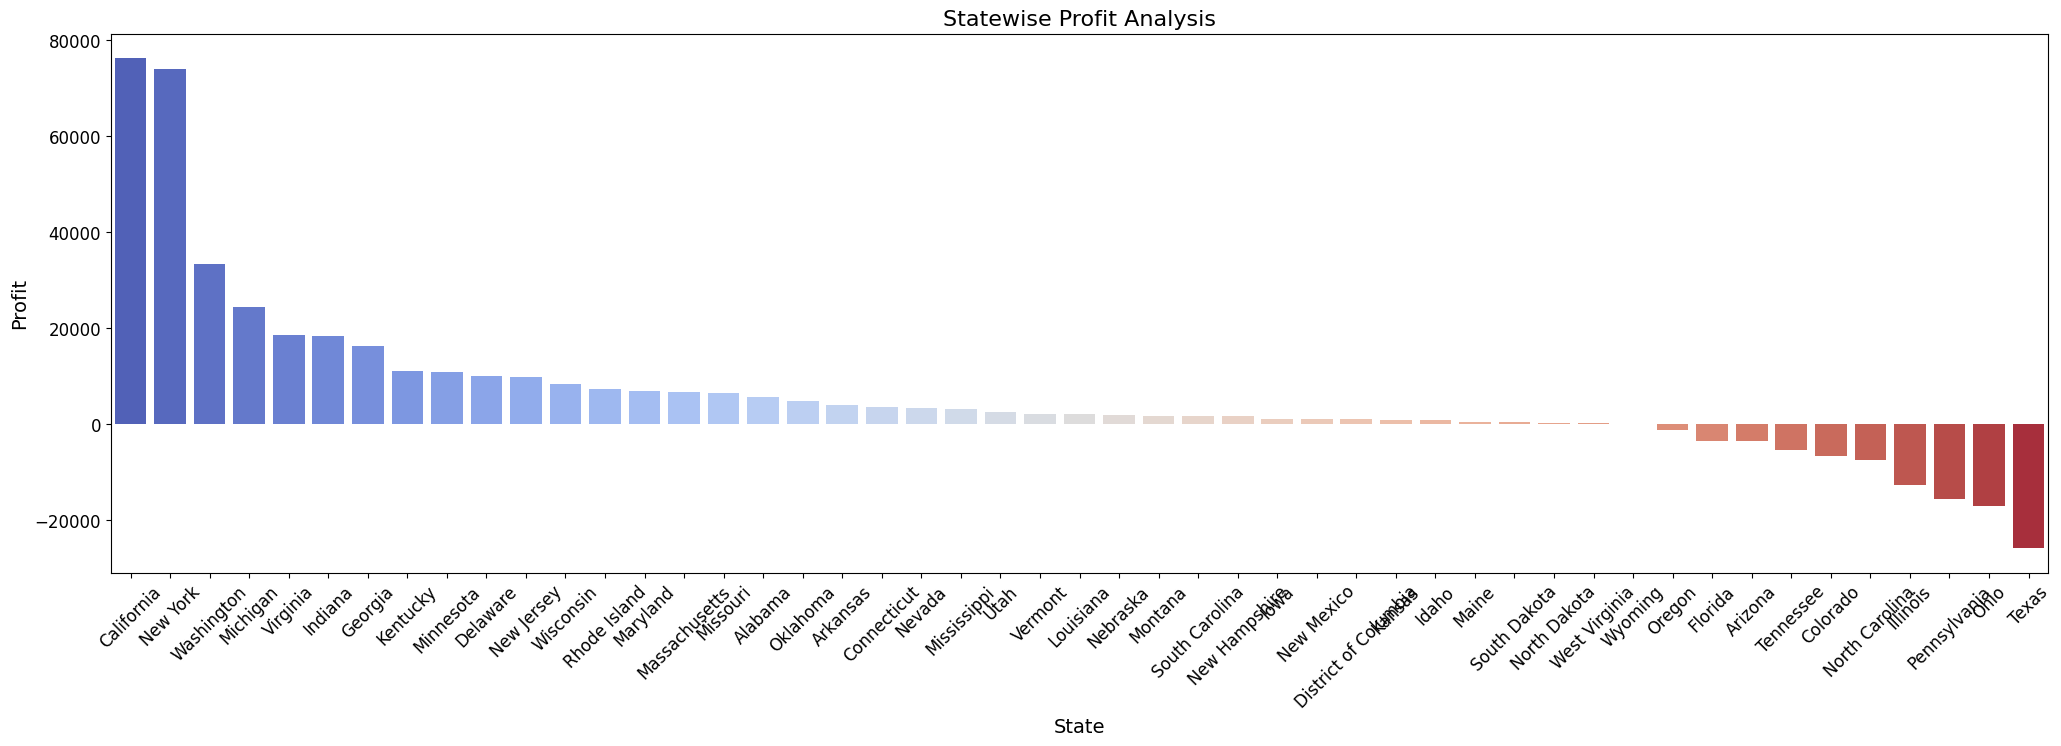

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(25, 7))
sns.barplot(x=state_profit.index, y=state_profit.values, palette='coolwarm')

plt.title('Statewise Profit Analysis', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Observation:1**


*   State California and New York gain max. profit
*   where as Ohio and Texas end up min. profit



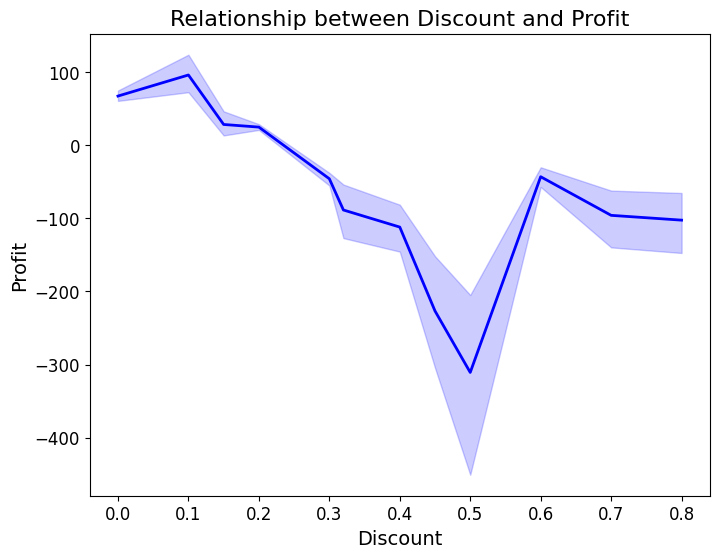

In [14]:
#plot the graph between discount and profit

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Discount', y='Profit', color='blue', linewidth=2)

plt.title('Relationship between Discount and Profit', fontsize=16)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


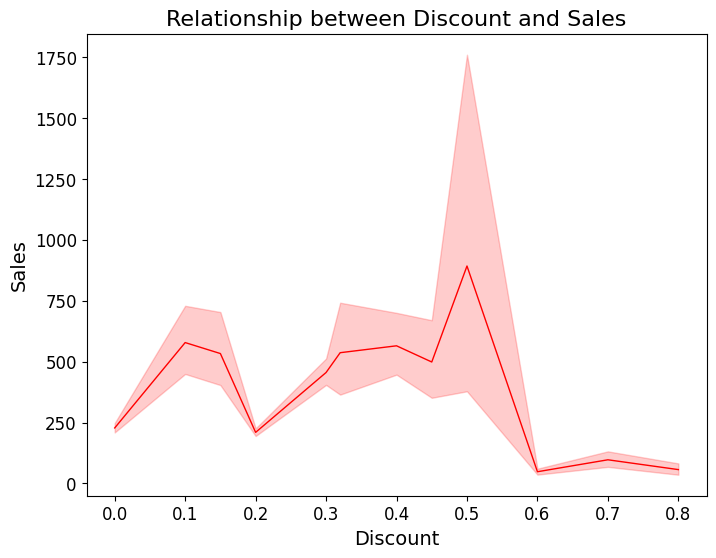

In [17]:
#plot discount vs sales

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Discount', y='Sales', color='red', linewidth=1)

plt.title('Relationship between Discount and Sales', fontsize=16)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Observation:2**



*   Discount is not related to Sales nor Profit
*   By giving more dicount, can't hope for more profit



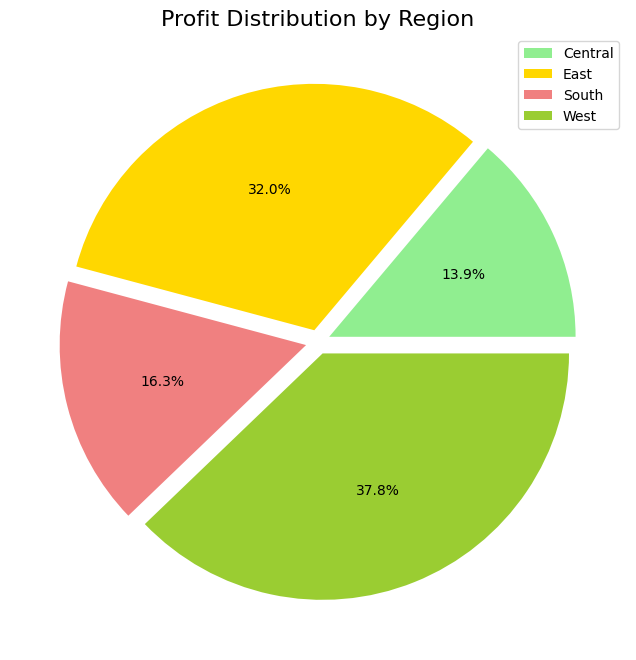

In [18]:
#pie chart for profit of different regions

# Group data by Region and calculate sum of Profit
region_profit = df.groupby('Region')['Profit'].sum()

# Define color palette
colors = ['lightgreen', 'gold', 'lightcoral', 'yellowgreen']

# Create the pie chart
plt.figure(figsize=(15, 8))
plt.pie(region_profit, explode=(0.05, 0.05, 0.05, 0.05), shadow=False, colors=colors, autopct="%1.1f%%")

# Add title and labels
plt.title('Profit Distribution by Region', fontsize=16)
plt.legend(labels=region_profit.index, loc='upper right')

# Show the pie chart
plt.show()


**Observation:3**



*   Region WEST has achived max. profit
*   Region CENTRAL ends up with least profit



<Figure size 1200x600 with 0 Axes>

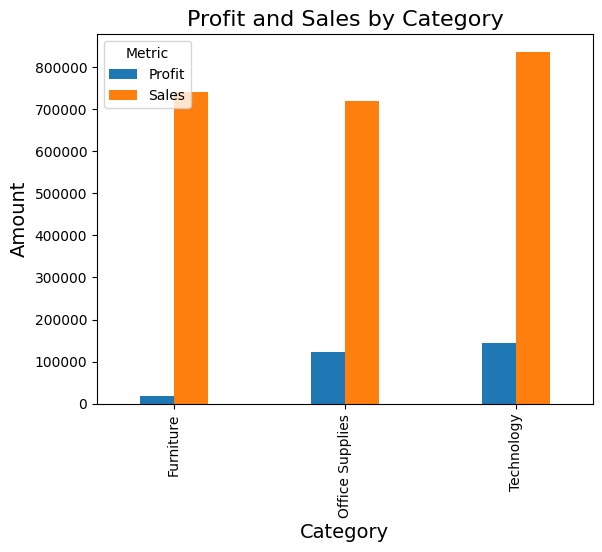

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group data by Category and calculate sum of Profit and Sales
category_data = df.groupby('Category')[['Profit', 'Sales']].sum()

# Create a bar chart with two bars per category
plt.figure(figsize=(12, 6))
category_data.plot(kind='bar', width=0.4)

# Add title, labels, and legend
plt.title('Profit and Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Metric', loc='upper left')

# Show the bar chart
plt.show()


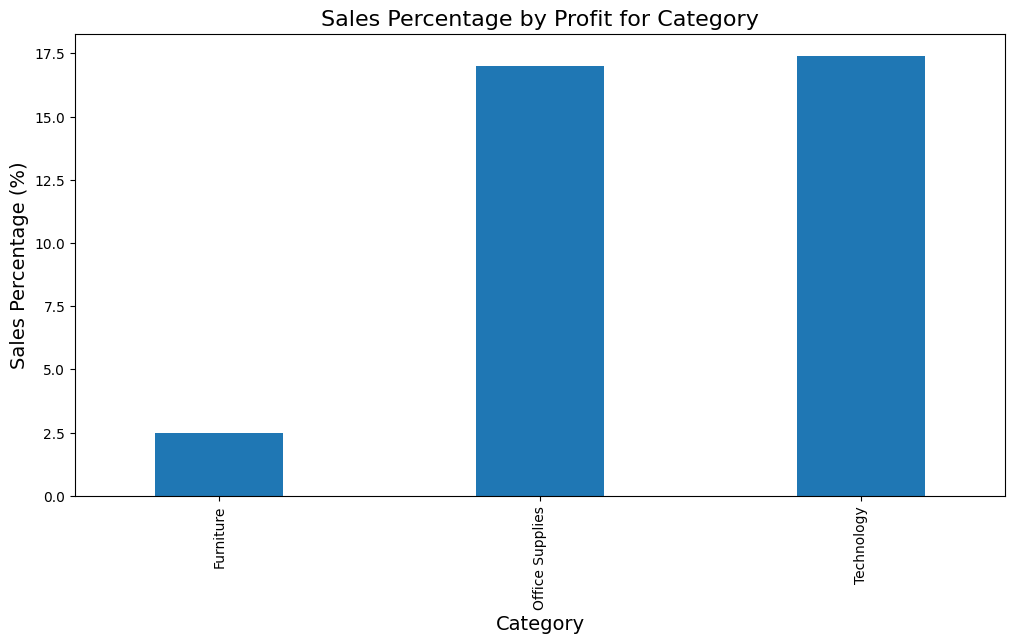

In [45]:
#profit to sales percentage for category

# Calculate the sales percentage for each category
sales_by_category = df.groupby('Category')['Sales'].sum()
profit_by_category = df.groupby('Category')['Profit'].sum()
sales_percentage_by_profit = (profit_by_category / sales_by_category) * 100

# Create a bar chart with two bars per category
plt.figure(figsize=(12, 6))
sales_percentage_by_profit.plot(kind='bar', width=0.4)

# Add title, labels, and legend
plt.title('Sales Percentage by Profit for Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Sales Percentage (%)', fontsize=14)

# Show the bar chart
plt.show()


**Observation:4**



*   Technology catagory has highest profit compare to other
*   But Office Supplies and Technolgy have almost same profit to sales percentage



<Figure size 1200x600 with 0 Axes>

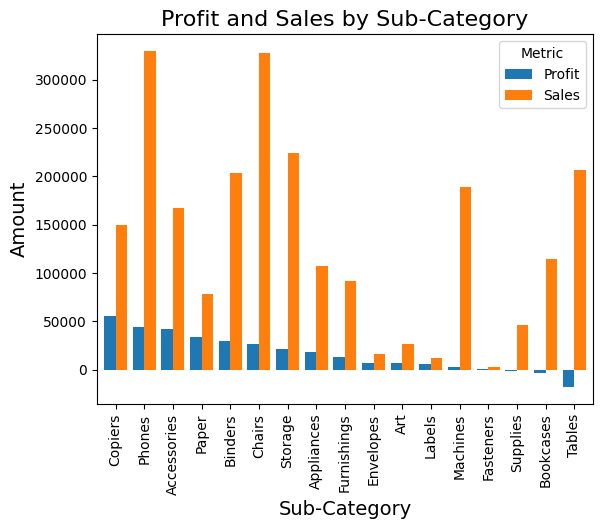

In [31]:
#plot subcatagory and profit and sales in decreasing order

# Group data by Sub-Category and calculate sum of Profit and Sales
subcat_data = df.groupby('Sub-Category')[['Profit', 'Sales']].sum().sort_values(by='Profit', ascending=False)

# Create a bar chart with two bars per category
plt.figure(figsize=(12, 6))
subcat_data.plot(kind='bar', width=0.8)

# Add title, labels, and legend
plt.title('Profit and Sales by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Metric', loc='upper right')

# Show the bar chart
plt.show()


**Observation:5**



*   Sub-category Phones and Chairs have high sales
*   But Copiers has high Profit compare to others
*   Tables has avg. sales but ends up most loss



<Figure size 1200x600 with 0 Axes>

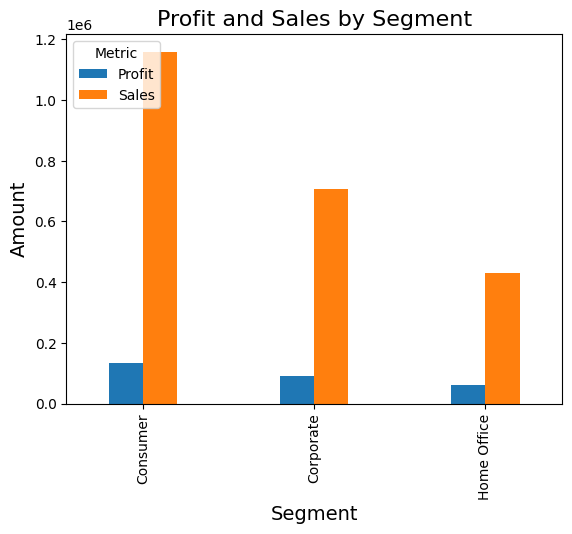

In [39]:
#plot sagement and profit and sales

# Group data by Segment and calculate sum of Profit and Sales
segment_data = df.groupby('Segment')[['Profit', 'Sales']].sum()

# Create a bar chart with two bars per category
plt.figure(figsize=(12, 6))
segment_data.plot(kind='bar', width=0.4)

# Add title, labels, and legend
plt.title('Profit and Sales by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Metric', loc='upper left')

# Show the bar chart
plt.show()


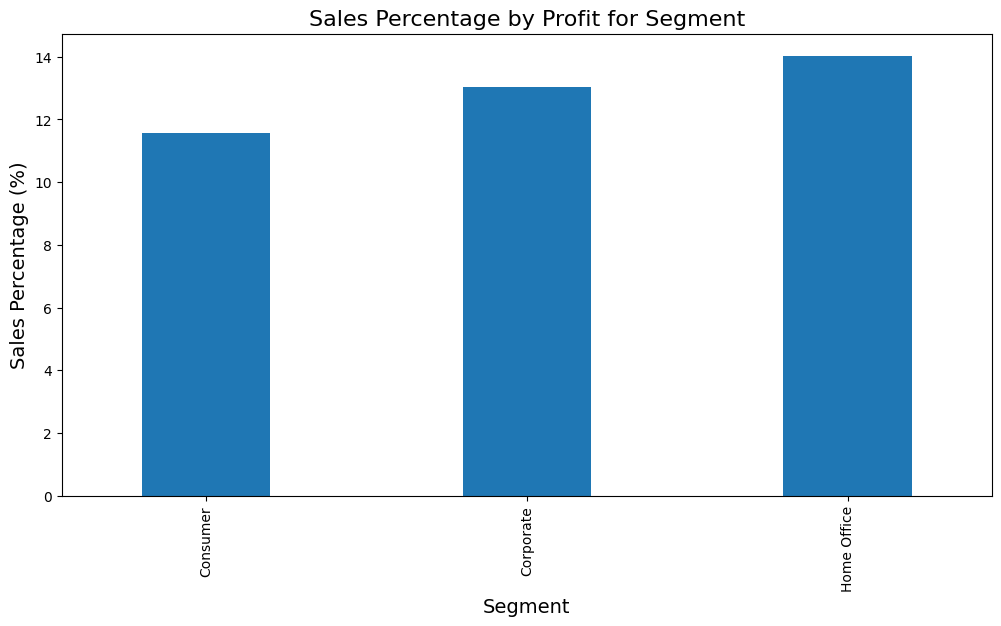

In [46]:
#profit to sales percentage for segment

# Calculate the sales percentage for each segment
sales_by_segment = df.groupby('Segment')['Sales'].sum()
profit_by_segment = df.groupby('Segment')['Profit'].sum()
sales_percentage_by_profit = (profit_by_segment / sales_by_segment) * 100

# Create a bar chart with two bars per category
plt.figure(figsize=(12, 6))
sales_percentage_by_profit.plot(kind='bar', width=0.4)

# Add title, labels, and legend
plt.title('Sales Percentage by Profit for Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Sales Percentage (%)', fontsize=14)

# Show the bar chart
plt.show()


**Observation:6**



*   Segment Consumer has high sales and profit
*   But Home Office having high profit to sales percentage

